In [1]:
import sys
ROOT_DIR = "./"
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

In [2]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import h5py as h5
import time
import datetime
from matplotlib.colors import LogNorm
from sklearn.metrics.pairwise import euclidean_distances
from tqdm import tqdm

import pysingfel as ps
import pysingfel.gpu as pg

Psana functionality is not available.


In [3]:
def show_ds(experiment, dataset):
    N = dataset.shape[0]
    plt.figure(figsize=(20, 20/N+1))
    for i in range(N):
        ax = plt.subplot(1, N, i+1)
        img = experiment.det.assemble_image_stack(dataset[i])
        cax = plt.imshow(img, norm=LogNorm())
        
    plt.colorbar(cax)
    plt.show()    

In [4]:
beam = ps.Beam(photon_energy=6000, fluence=1.58e12, focus_radius=1.13e-7)

In [5]:
particle = ps.Particle()
particle.read_pdb(ROOT_DIR+'/2NIP.pdb', ff='WK')

In [6]:
natoms = particle.get_num_atoms()
print ('Number of atoms =',natoms)

Number of atoms = 4735


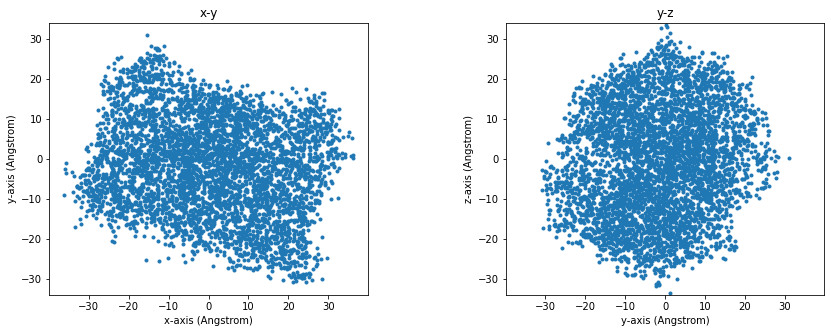

In [7]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(particle.atom_pos[:,0]*1e10,particle.atom_pos[:,1]*1e10,'.');
# Auto ajust axis
ax[0].set_aspect('equal', 'box')
ax[0].set_xlabel('x-axis (Angstrom)')
ax[0].set_ylabel('y-axis (Angstrom)')
ax[0].set_title('x-y')

ax[1].plot(particle.atom_pos[:,1]*1e10,particle.atom_pos[:,2]*1e10,'.');
ax[1].set_aspect('equal','box')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlabel('y-axis (Angstrom)')
ax[1].set_ylabel('z-axis (Angstrom)')
ax[1].set_title('y-z')

plt.show()

# Simple Square Detector

In [8]:
det = ps.SimpleSquareDetector(N_pixel=200, det_size=0.2, det_distance=0.5)

In [9]:
N_images = 5

In [10]:
experiment = ps.SPIExperiment(det, beam, particle)

In [11]:
intensities = np.zeros((N_images,) + det.shape, np.float32)
photons = np.zeros((N_images,) + det.shape, np.int32)

In [12]:
for i in tqdm(range(N_images)):
    photons[i], intensities[i] = experiment.generate_image_stack(return_photons=True, return_intensities=True)

100%|██████████| 5/5 [00:00<00:00,  8.74it/s]


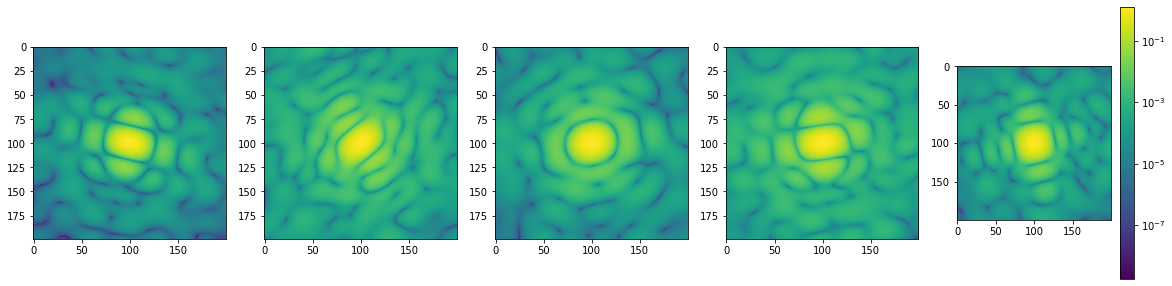

In [13]:
show_ds(experiment, intensities)

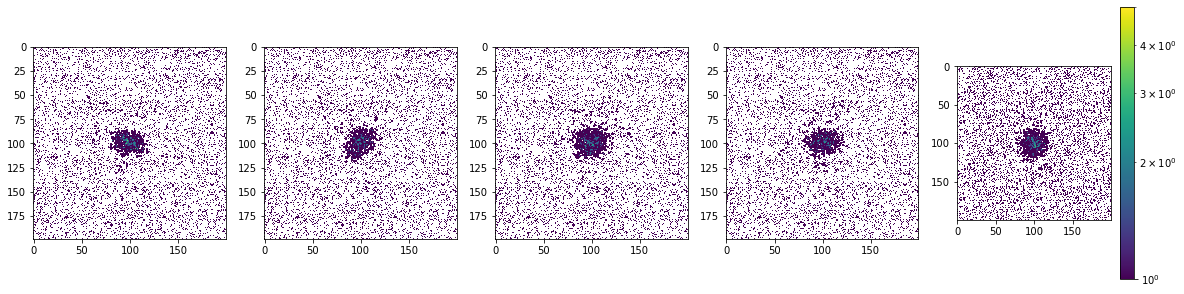

In [14]:
show_ds(experiment, photons)

In [15]:
for ph in intensities:
    print ('Nphotons =',np.sum(ph))

Nphotons = 503.12527
Nphotons = 491.9944
Nphotons = 610.9498
Nphotons = 512.2225
Nphotons = 696.43884


In [16]:
for ph in photons:
    print ('Nphotons =',np.sum(ph))

Nphotons = 479
Nphotons = 486
Nphotons = 654
Nphotons = 503
Nphotons = 739
